<a href="https://colab.research.google.com/github/Rareshs/PyProjects/blob/main/Fatal_Force_Done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [7]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [8]:
print(f"{df_hh_income.isna().sum()} ")
print("")
print(df_pct_poverty.isna().sum())
print("")
print(df_pct_completed_hs.isna().sum())
print("")
print(df_share_race_city.isna().sum())
print("")
print(df_fatalities.isna().sum())



#print(f"It has: {df_hh_income.isna().sum()} null values")

Geographic Area     0
City                0
Median Income      51
dtype: int64 

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [9]:
print(df_hh_income.duplicated().sum())
print(df_pct_poverty.duplicated().sum())
print(df_pct_completed_hs.duplicated().sum())
print(df_share_race_city.duplicated().sum())
print(df_fatalities.duplicated().sum())


0
0
0
0
0


In [10]:
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)



In [11]:
df_fatalities.isna().sum()

,0
id,0
name,0
date,0
manner_of_death,0
armed,0
age,0
gender,0
race,0
city,0
state,0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')


In [13]:
df_pct_poverty.groupby('Geographic Area').sum().sort_values(by='poverty_rate', ascending=False).round()

,City,poverty_rate
Geographic Area,,
TX,Abbott cityAbernathy cityAbilene cityAbram CDP...,"34,060.00"
CA,Acalanes Ridge CDPAcampo CDPActon CDPAdelanto ...,"25,704.00"
PA,Aaronsburg CDP (Centre County)Aaronsburg CDP (...,"22,002.00"
MO,Adrian cityAdvance cityAffton CDPAgency villag...,"20,588.00"
IL,Abingdon cityAdair CDPAddieville villageAddiso...,"18,946.00"
OH,Aberdeen villageAda villageAdamsville villageA...,"18,014.00"
FL,Acacia Villas CDPAlachua cityAlafaya CDPAlford...,"16,073.00"
OK,Achille townAda cityAdair townAddington townAf...,"15,266.00"
GA,Abbeville cityAcworth cityAdairsville cityAdel...,"14,837.00"


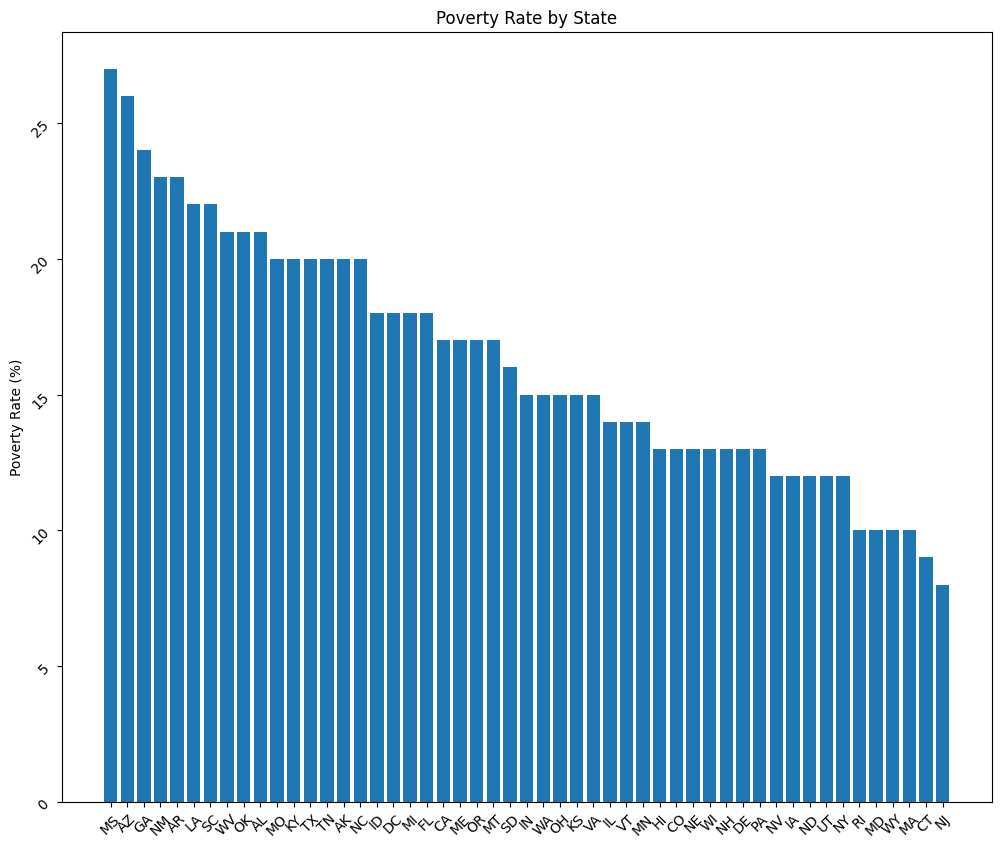

In [14]:
poverty_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False).round()


plt.figure(figsize=(12, 10))

plt.bar(poverty_rate.index, poverty_rate.values)

plt.ylabel('Poverty Rate (%)')
plt.title('Poverty Rate by State')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [15]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

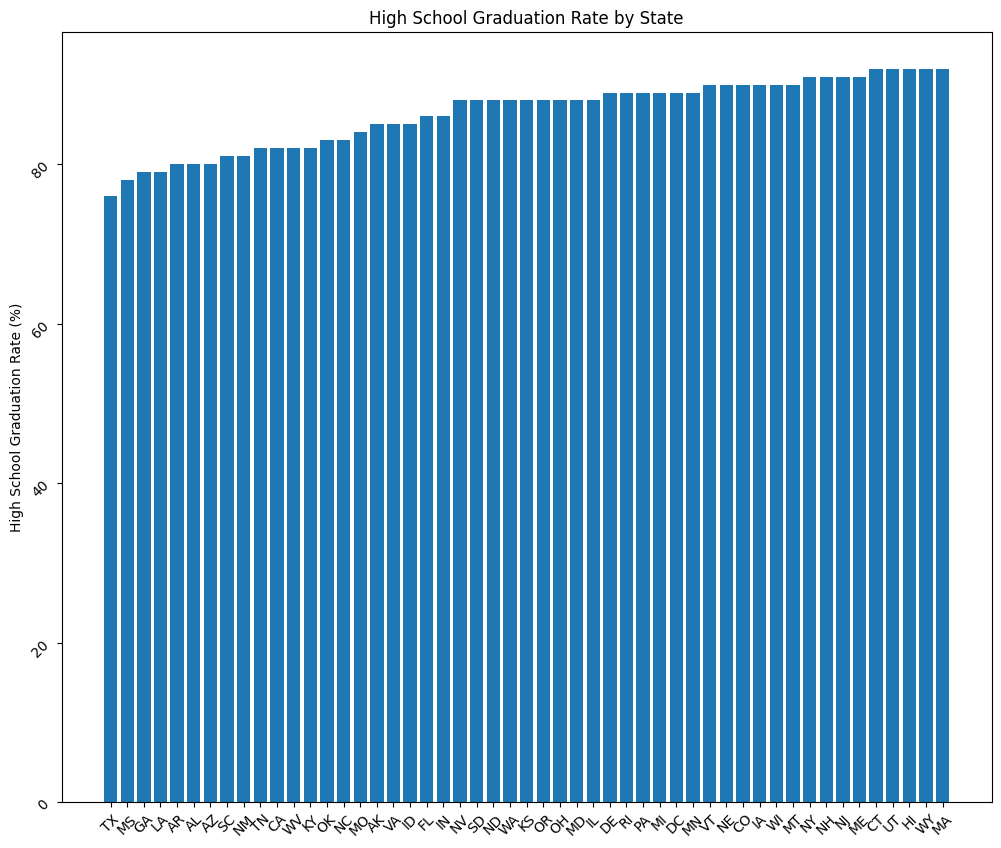

In [16]:
hs_grad_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True).round()

plt.figure(figsize=(12, 10))

plt.bar(hs_grad_rate.index, hs_grad_rate.values)

plt.ylabel('High School Graduation Rate (%)')
plt.title('High School Graduation Rate by State')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

<ipython-input-17-e8ceb4f25776>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(combined_data['Geographic Area'], rotation=45)


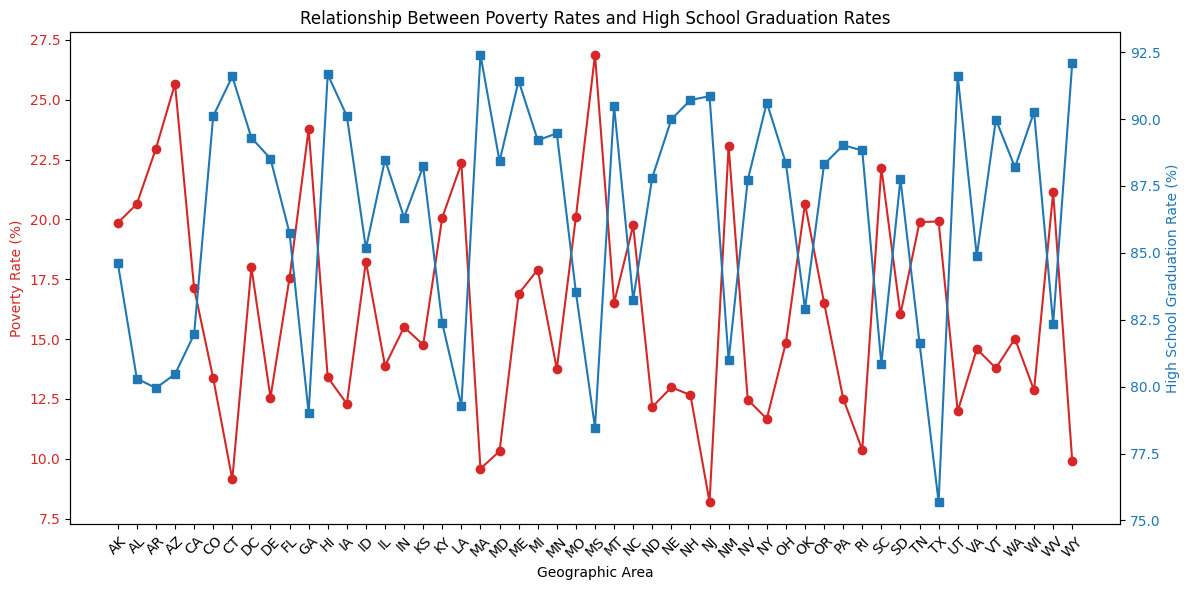

In [17]:
poverty_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
hs_grad_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()


combined_data = pd.DataFrame({
    'Poverty Rate': poverty_rate,
    'High School Graduation Rate': hs_grad_rate
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Geographic Area')
ax1.set_ylabel('Poverty Rate (%)', color=color)
ax1.plot(combined_data['Geographic Area'], combined_data['Poverty Rate'], color=color, marker='o', label='Poverty Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(combined_data['Geographic Area'], rotation=45)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('High School Graduation Rate (%)', color=color)
ax2.plot(combined_data['Geographic Area'], combined_data['High School Graduation Rate'], color=color, marker='s', label='High School Graduation Rate')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Relationship Between Poverty Rates and High School Graduation Rates')
fig.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

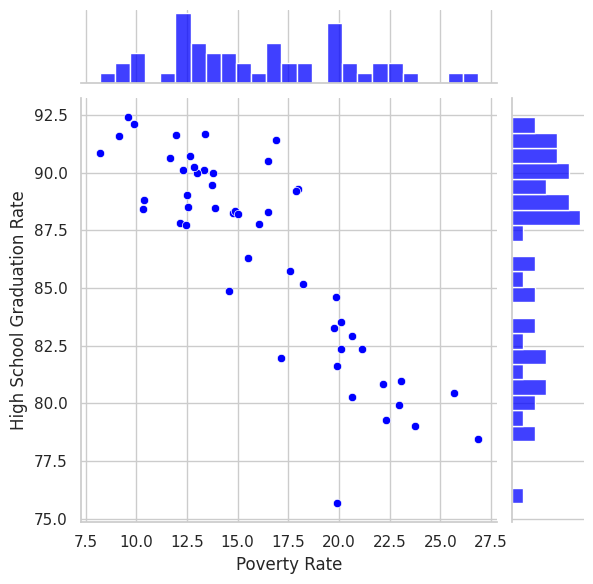

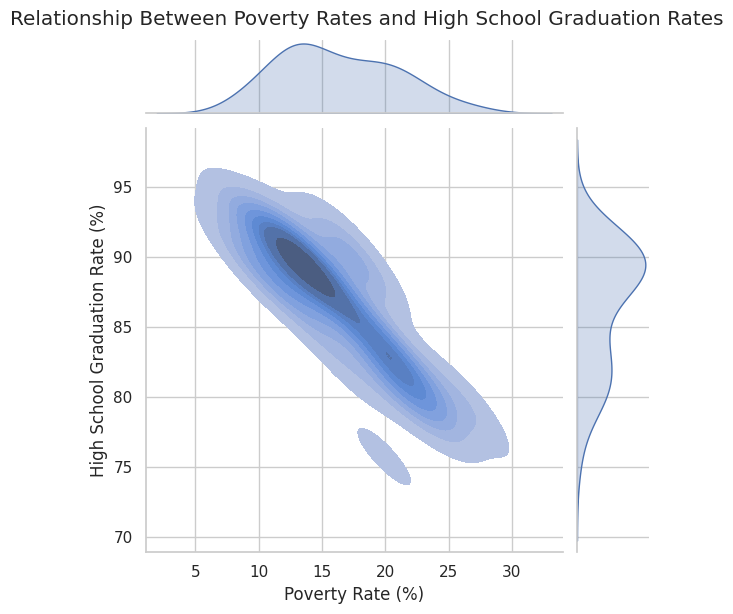

In [18]:
sns.set(style="whitegrid")

# Create the jointplot
joint_plot = sns.jointplot(
    x='Poverty Rate',
    y='High School Graduation Rate',
    data=combined_data,
    kind='scatter',
    color='blue',
    marginal_kws=dict(bins=25, fill=True)
)

# Add a Kernel Density Estimate
joint_plot = sns.jointplot(
    x='Poverty Rate',
    y='High School Graduation Rate',
    data=combined_data,
    kind='kde',
    fill=True
)

# Adding titles and labels
plt.suptitle('Relationship Between Poverty Rates and High School Graduation Rates', y=1.02)
joint_plot.set_axis_labels('Poverty Rate (%)', 'High School Graduation Rate (%)')

# Show the plot
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

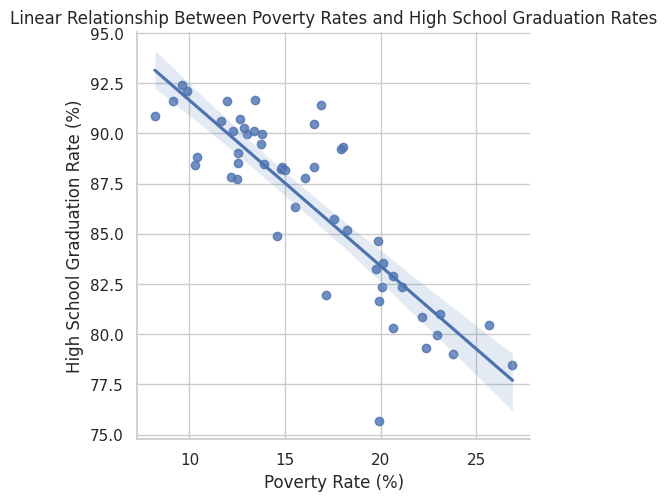

In [19]:
sns.lmplot(
    x='Poverty Rate',
    y='High School Graduation Rate',
    data=combined_data
)
plt.title('Linear Relationship Between Poverty Rates and High School Graduation Rates')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')

# Show the plot
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [25]:
df_share_race_city.sample(5)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
3028,CA,Rancho Murieta CDP,88.80,2.40,0.60,2.9,7.7
5013,FL,White Springs town,48.30,48.50,0.00,0.3,3.3
21157,OR,Crabtree CDP,95.90,0.00,1.00,0.3,2.6
22247,PA,Laceyville borough,94.50,0.50,0.00,0,7.9
4472,FL,Hudson CDP,95.30,0.70,0.40,1.2,5


In [27]:
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')

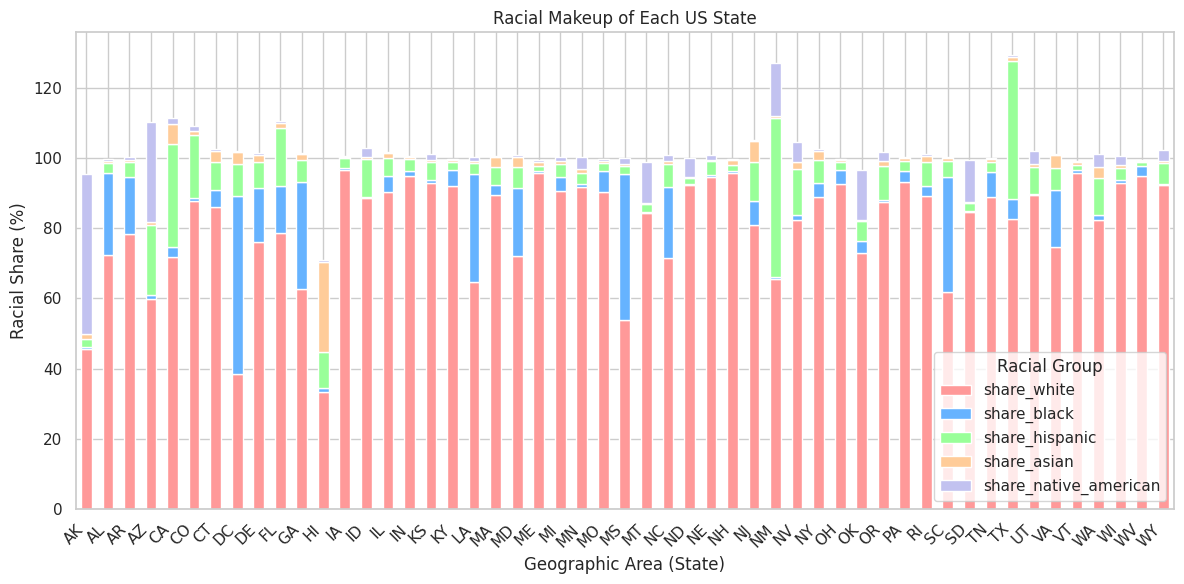

In [36]:
share_race = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']].mean()
share_race

share_race.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'])

# Adding labels and title
plt.title('Racial Makeup of Each US State')
plt.xlabel('Geographic Area (State)')
plt.ylabel('Racial Share (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the legend
plt.legend(title='Racial Group')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [42]:
df_fatalities.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1498,1681,Anthony Nunez,04/07/16,shot,gun,18.00,M,H,San Jose,CA,True,other,Not fleeing,False
2161,2408,TK TK,08/03/17,shot,knife,0.00,M,0,Riverside,CA,False,other,Not fleeing,False
2264,2522,William D. Spates,22/04/17,shot,vehicle,39.00,M,B,Portage,IN,True,other,Not fleeing,False
486,610,John Leonard Berry,06/07/15,shot and Tasered,vehicle,31.00,M,W,Lakewood,CA,True,attack,Other,False
1443,1633,William Thomas Hennessey,18/06/16,shot,toy weapon,34.00,M,W,Huntsville,AL,False,attack,Not fleeing,True


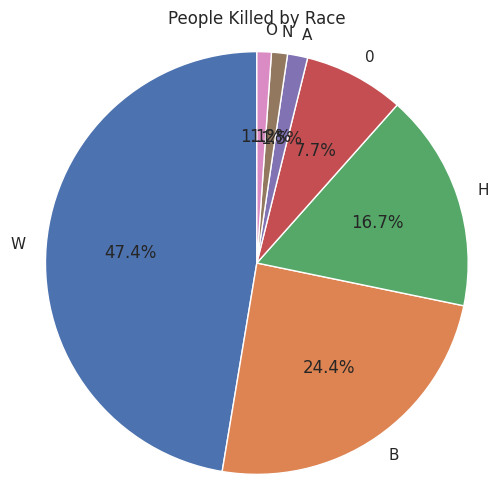

In [40]:
death_by_race=df_fatalities['race'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(death_by_race, labels=death_by_race.index, autopct='%1.1f%%', startangle=90)
plt.title('People Killed by Race')
plt.axis('equal')
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [44]:
gender_fatalities=df_fatalities['gender'].value_counts()
gender_fatalities

,count
gender,
M,2428
F,107


([<matplotlib.patches.Wedge at 0x7b6b4aa55ea0>,
 [Text(-0.14543704200813984, -1.0903430959161078, 'M'),
  Text(0.14543709305078337, 1.0903430891077075, 'F')],
 [Text(-0.07932929564080353, -0.5947325977724224, '95.8%'),
  Text(0.07932932348224547, 0.5947325940587495, '4.2%')])

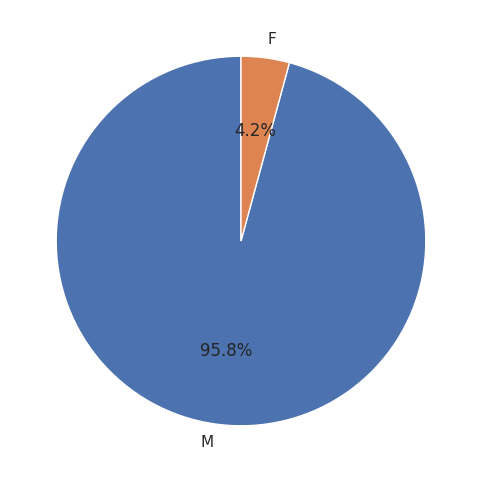

In [45]:
gender_fatalities=df_fatalities['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_fatalities, labels=gender_fatalities.index, autopct='%1.1f%%', startangle=90)

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [46]:
df_fatalities.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1004,1150,Charles Hollstein,06/01/16,shot,toy weapon,38.00,M,W,Zion,IL,True,other,Foot,False
1892,2111,Daniel Riedmann,07/12/16,shot,undetermined,36.00,M,W,Sioux City,IA,False,other,Not fleeing,False
811,955,Marquesha McMillan,26/10/15,shot,gun,21.00,F,B,Washington,DC,False,attack,Not fleeing,False
562,687,Roger Darrin Barker,29/07/15,shot,gun,53.00,M,W,Logan,UT,True,attack,Not fleeing,False
206,295,Jamison Childress,19/03/15,shot,unarmed,20.00,M,W,Sumas,WA,True,attack,Not fleeing,False


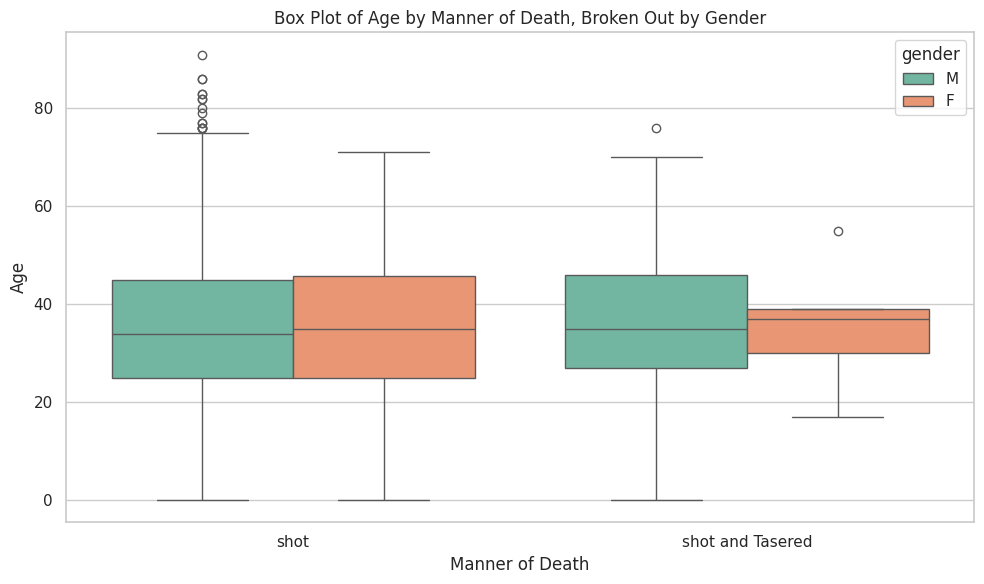

In [47]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x='manner_of_death',
    y='age',
    hue='gender',
    data=df_fatalities,
    palette='Set2'
)

plt.title('Box Plot of Age by Manner of Death, Broken Out by Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [48]:
armed_count=df_fatalities['armed'].value_counts()
armed_count

,count
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117
...,...
straight edge razor,1
baseball bat and fireplace poker,1
bean-bag gun,1


In [50]:
weapon_breakdown = df_fatalities['armed'].value_counts(normalize=False)
weapon_breakdown

,count
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117
...,...
straight edge razor,1
baseball bat and fireplace poker,1
bean-bag gun,1


<ipython-input-51-0d5b377c974e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_breakdown.index, y=weapon_breakdown.values, palette='Set2')


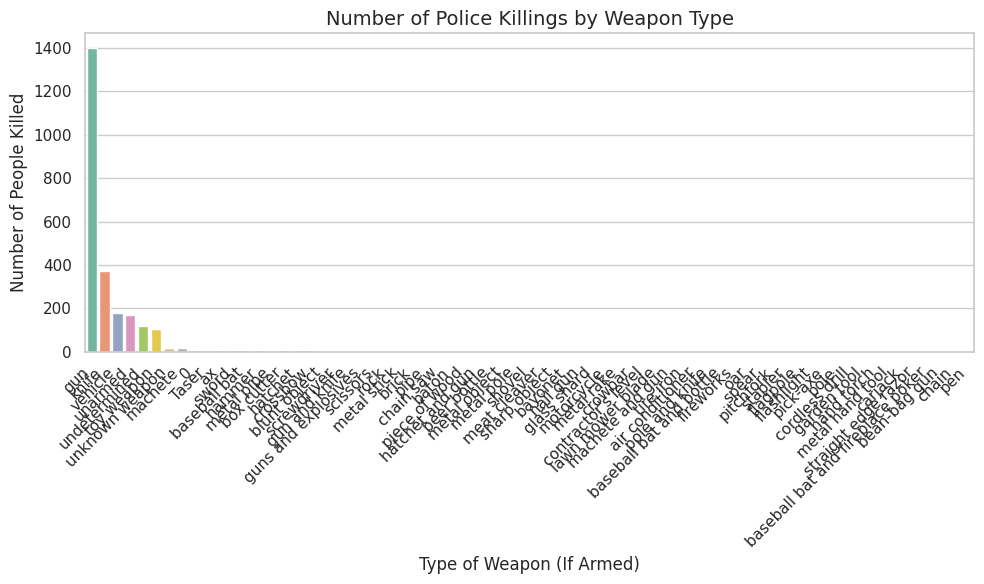

Percentage of people armed: armed
gun                                55.15
knife                              14.71
vehicle                             6.98
unarmed                             6.75
undetermined                        4.62
                                    ... 
straight edge razor                 0.04
baseball bat and fireplace poker    0.04
bean-bag gun                        0.04
chain                               0.04
pen                                 0.04
Name: count, Length: 69, dtype: float64


In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_breakdown.index, y=weapon_breakdown.values, palette='Set2')

plt.title('Number of Police Killings by Weapon Type', fontsize=14)
plt.xlabel('Type of Weapon (If Armed)', fontsize=12)
plt.ylabel('Number of People Killed', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

total_killings = len(df_fatalities)
percent_armed = (armed_count / total_killings) * 100
print(f"Percentage of people armed: {percent_armed}")

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [59]:
under_25=df_fatalities[df_fatalities['age']<25]
total_killed = df_fatalities.shape[0]
under_25_count = under_25.shape[0]
percent_under_25 = (under_25_count / total_killed) * 100

print(f"Percentage of people killed who were under 25 years old: {percent_under_25:.2f}%")

14
Percentage of people killed who were under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

Create a seperate KDE plot for each race. Is there a difference between the distributions?

# Race of People Killed

Create a chart that shows the total number of people killed by race.

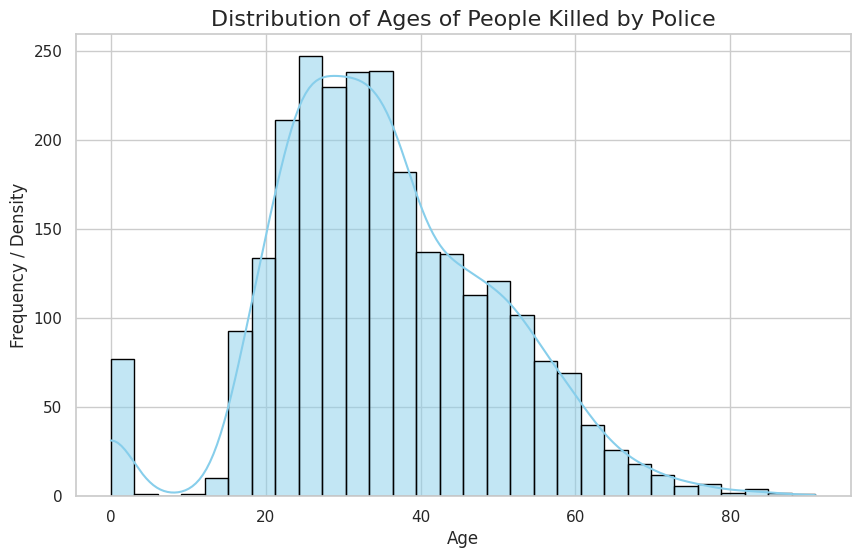

In [60]:
plt.figure(figsize=(10, 6))

sns.histplot(df_fatalities['age'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency / Density', fontsize=12)


plt.show()

In [61]:
min_age = df_fatalities['age'].min()
max_age = df_fatalities['age'].max()

print(f"Minimum age: {min_age}, Maximum age: {max_age}")

Minimum age: 0.0, Maximum age: 91.0


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [62]:
total_fatalities = df_fatalities.shape[0]

mental_illness_count = df_fatalities[df_fatalities['signs_of_mental_illness'] == True].shape[0]

percent_with_mental_illness = (mental_illness_count / total_fatalities) * 100

print(f"Percentage of people killed by police with diagnosed mental illness: {percent_with_mental_illness:.2f}%")

Percentage of people killed by police with diagnosed mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

<ipython-input-65-9aedefe0e4c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities_by_fatality.index, y=top_10_cities_by_fatality.values, palette='Set2')


Text(0.5, 1.0, 'Top 10 Cities with the Most Police Killings')

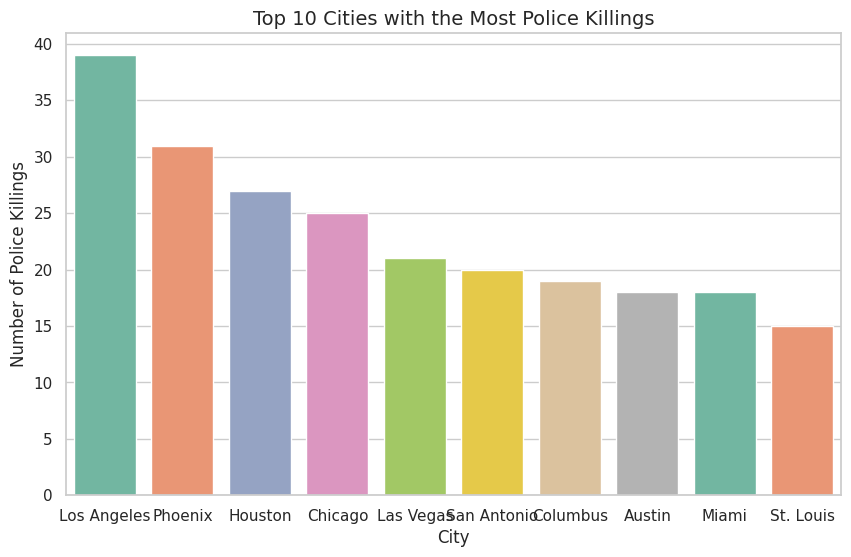

In [65]:
top_10_cities_by_fatality=df_fatalities['city'].value_counts().head(10)
top_10_cities_by_fatality

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities_by_fatality.index, y=top_10_cities_by_fatality.values, palette='Set2')
plt.ylabel('Number of Police Killings', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Top 10 Cities with the Most Police Killings', fontsize=14)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [78]:
top_10_cities_by_fatality = df_fatalities['city'].value_counts().head(10)
top_cities = top_10_cities_by_fatality.index

# Step 2: Filter racial demographics for top cities
race_demographics_top_cities = df_share_race_city[df_share_race_city['City'].isin(top_cities)].copy()
race_demographics_top_cities.rename(columns={'City': 'city'}, inplace=True)

# Step 3: Count fatalities in top cities
fatalities_with_race = df_fatalities[df_fatalities['city'].isin(top_cities)]
fatalities_with_race_count = fatalities_with_race['city'].value_counts().reset_index()
fatalities_with_race_count.columns = ['city', 'fatality_count']

# Step 4: Merge race demographics with fatalities count
combined_data = pd.merge(race_demographics_top_cities, fatalities_with_race_count, on='city')

# Step 5: Calculate the rate of police killings by race
for race in ['share_white', 'share_black', 'share_hispanic', 'share_asian']:
    # Calculate the number of killed individuals for each race
    combined_data[f'killed_rate_{race}'] = (combined_data['fatality_count'] * combined_data[race]) / 100

# Step 6: Calculate the rate of police killings per race
combined_data['total_population'] = combined_data[['share_white', 'share_black', 'share_hispanic', 'share_asian']].sum(axis=1) / 100
for race in ['share_white', 'share_black', 'share_hispanic', 'share_asian']:
    combined_data[f'killed_rate_per_{race}'] = combined_data[f'killed_rate_{race}'] / combined_data['total_population']

# Step 7: Display the results
results = combined_data[['city', 'fatality_count', 'share_white', 'share_black', 'share_hispanic', 'share_asian',
                         'killed_rate_share_white', 'killed_rate_share_black', 'killed_rate_share_hispanic', 'killed_rate_share_asian']]

print(results)

Empty DataFrame
Columns: [city, fatality_count, share_white, share_black, share_hispanic, share_asian, killed_rate_share_white, killed_rate_share_black, killed_rate_share_hispanic, killed_rate_share_asian]
Index: []


In [74]:
print(race_demographics_top_cities.columns)
print(fatalities_with_race_count.columns)

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['city', 'fatality_count'], dtype='object')


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [82]:
police_killings_by_state = df_fatalities['state'].value_counts().reset_index()
police_killings_by_state.columns = ['state', 'killings']

police_killings_by_state['state'] = police_killings_by_state['state'].str.upper()  # ensure uppercase for matching


fig = px.choropleth(
    police_killings_by_state,
    locations='state',  # Name of the column with state names
    locationmode='USA-states',  # Use state abbreviations
    color='killings',  # Column with the data for coloring
    scope='usa',  # Limit map to USA
    color_continuous_scale='Reds',
    labels={'killings': 'Number of Police Killings'},
    title='Police Killings by U.S. State'
)

fig.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

<ipython-input-84-231b57e508c7>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



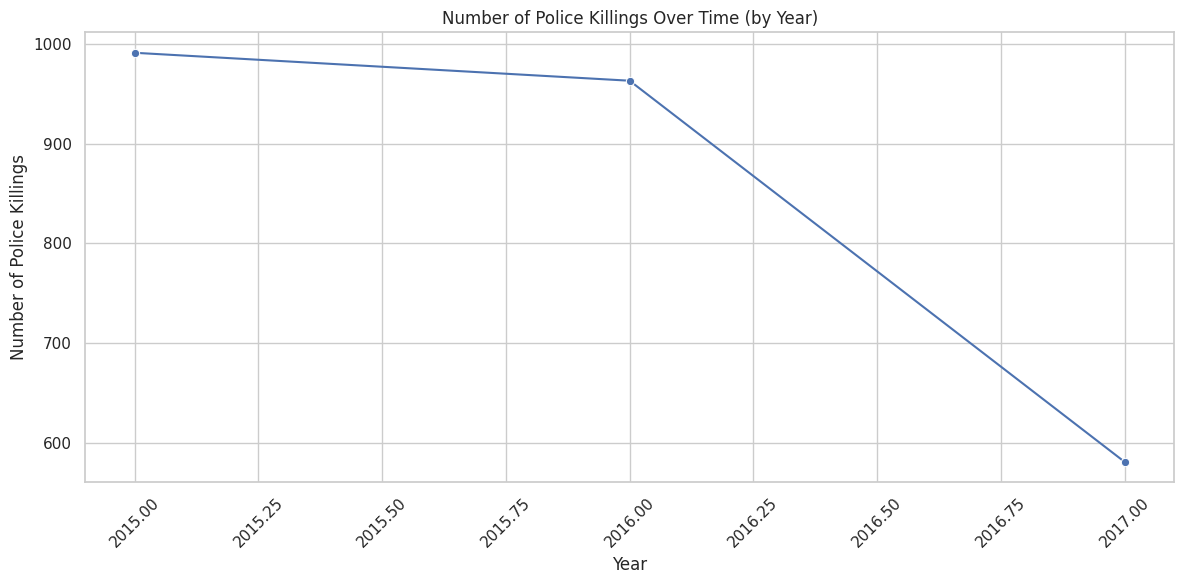

NameError: name 'killings_per_month' is not defined

<Figure size 1200x600 with 0 Axes>

In [84]:
sns.set(style='whitegrid')

df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities['year'] = df_fatalities['date'].dt.year

killings_per_year = df_fatalities.groupby('year').size().reset_index(name='killings')
# Plotting for yearly data
plt.figure(figsize=(12, 6))
sns.lineplot(data=killings_per_year, x='year', y='killings', marker='o')
plt.title('Number of Police Killings Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Police Killings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).